<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/MS_spherical_collocation_shift_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy import exp



N = 30

L0 = 2                                                 # Map parameter

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))     # collocation points

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                      # physical domain              

rcol = 1/np.sqrt(L0**2+r**2)-r**2/(L0**2+r**2)**(3/2)          # dcol/dr

rrcol = -3*r/(L0**2+r**2)**(3/2)+3*r**3/(L0**2+r**2)**(5/2)     # d^2 col/dr^2


# Base Matrix (Tchebyshev Polinomials):

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])




for i in range(N+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


psi = SB[0:N+1,:]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]



# Initial conditions of Phi                                     

r0 = 0.5

A0 = 0.0001

sigma = 1

Phi_0 = A0*r**2*np.exp(-(r-r0)**2/sigma**2)            # Phi initial

rPhi_0 = 2*A0*r*np.exp(-(r-r0)**2/sigma**2)-2*A0*r**2*(r-r0)*np.exp(-(r-r0)**2/sigma**2)/sigma**2

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)



Phi = np.dot(a0, psi)      # approximative solution in t=0

rPhi= np.dot(a0, rpsi)

rrPhi = np.dot(a0, rrpsi)


In [43]:
# Plot: Initial Conditions

M = 3000

rplot = np.linspace(0,30,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

psiplot = SBplot[0:N+1,:] 

Phi_plot0 = 0.0001*rplot**2*np.exp(-(rplot-0.5)**2)     

#dtf_plot0 = (2*(xplot))*np.exp(-(xplot)**2/u**2)/u**2 

Phiplot = np.dot(a0, psiplot)

erro = (Phiplot - Phi_plot0)

#dtphiplot = np.dot(da, psiplot)
#da01 = np.dot(dtf_k0, inv_psi)

#dtfplot = (1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

#dtphiplot = np.dot(da01, psiplot)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


In [ ]:
np.shape(SBplot)

(31, 3000)

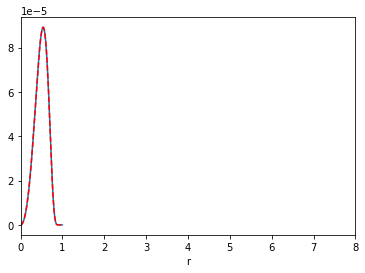

In [44]:
plt.plot(colplot, Phiplot, colplot, Phi_plot0, "--r")
plt.xlim(0,8)
plt.xlabel('r')
plt.show()

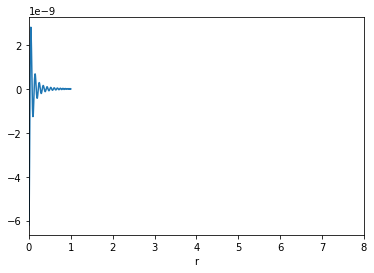

In [ ]:
plt.plot(colplot, erro)
plt.xlim(0,8)
plt.xlabel('r')
plt.show()

In [45]:
# Initial values of PI:

Pi_0 = np.zeros([N+1])

b0 = np.dot(Pi_0, inv_psi)

Pi = np.dot(b0, psi) 

rPi= np.dot(b0, rpsi)

rrPi = np.dot(b0, rrpsi)

In [48]:
np.shape(b0)

(31,)

In [ ]:
# Initial Chi: import from maple csv file

url = 'https://raw.githubusercontent.com/phmouras/Projeto_Pos/main/c0.csv'

df = pd.read_csv(url)

c0 = np.array(list(map(float,df)))
 
Chi = np.dot(c0, psi)

rChi = np.dot(c0, rpsi)

rrChi = np.dot(c0, rrpsi)

In [49]:
np.shape(c0)

(31,)

In [77]:
# Initial values of Krr:

Krr_0 = np.zeros([N+1])


SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])

rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])

rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])


inv_SB1 = np.linalg.inv(SB1)

ck0 = np.dot(Krr_0, inv_SB1)

Krr = np.dot(ck0, SB1) 

rKrr = np.dot(ck0, rSB1)

rrKrr = np.dot(ck0, rrSB1)

# Equation for Krr: momentum constraint

dck = np.dot(2*np.dot(rChi,Krr) + rKrr + 3/r*Krr + np.dot(Pi,rPhi)*np.exp(4*Chi), inv_SB1)


In [107]:
dck

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [79]:
# Equation for Alpha:


# Initial values of alpha:

Alpha_0 = np.zeros([N+1])

al0 = np.dot(Alpha_0, inv_psi)

Alpha = 1 + np.dot(al0, psi)

rAlpha = np.dot(al0, rpsi)

rrAlpha = np.dot(al0, rrpsi)

V = 0

dal = np.dot(rrAlpha + 2*(1/r + rrChi)*rAlpha - 3/2*Alpha*np.exp(-4*Chi)*Krr**2 - Alpha*np.exp(4*Chi)*(Pi*2-V), inv_psi)


# Determinar os al

In [108]:
dal

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:

# Initial values of beta:

Beta_0 = np.zeros([N+1])

be0 = np.dot(Beta_0, inv_psi)

Beta = np.dot(be0, psi)

rBeta = np.dot(be0, rpsi)

rrBeta = np.dot(be0, rrpsi)

rBeta_r = np.dot(be0, rpsi/r)

# Equation for Beta:

dbe = np.dot(rBeta_r-3/2/r*Alpha*np.exp(-4*Chi)*Krr , inv_psi)



In [109]:
be0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Field  Equations

In [110]:
# Equation for Phi: 

da = np.dot(np.dot(Alpha,Pi) + np.dot(Beta, rPhi), inv_psi)

np.shape(da)

(31,)

In [111]:
# Equation for Pi: KG equation

db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)

np.shape(db)

(31, 31)

In [112]:
# Equation for Chi:

dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    

np.shape(dc)

(31,)

In [134]:
# Runge Kutta 4th order

h = 0.01
tf = 100

It = int(tf/h)

t = np.linspace(0, tf, It) 

phi_set = np.zeros([It,M])
chi_set = np.zeros([It,M])
pi_set = np.zeros([It,M])

V = 0

for i in range(It):

  db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(np.dot(Alpha,Pi) + np.dot(Beta, rPhi), inv_psi)
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)

  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi)
  
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  rrPi = np.dot(b0 + N1/2, rrpsi)

  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)

  db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_SB1)
  dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_SB1)    
  da = np.dot(np.dot(Alpha,Pi) + np.dot(Beta, rPhi), inv_SB1)
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi)
  
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  rrPi = np.dot(b0 + N2/2, rrpsi)

  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)

  db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(np.dot(Alpha,Pi) + np.dot(Beta, rPhi), inv_psi)
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db)
  
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi)
  
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  rrPi = np.dot(b0 + N3, rrpsi)

  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)

  db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(np.dot(Alpha,Pi) + np.dot(Beta, rPhi), inv_psi)
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)

  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  
# phi_set[i,:] = np.dot(a0, psiplot)
# pi_set[i,:] = np.dot(b0, psiplot)
  chi_set[i,:] = np.dot(c0, psiplot)

  


 
  


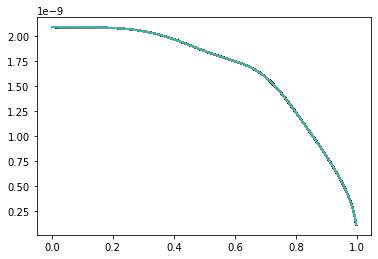

In [135]:
for i in range(It):
  plt.plot(colplot, chi_set[i,:])

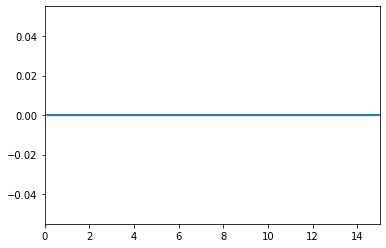

In [137]:
# Animation plot

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(0, 15))
line, = ax.plot([], [], lw=2)

x = rplot

def init():
    line.set_data([], [])
    return line,

def animate(i):
  y = chi_set[i,:]
  line.set_data(x, y)
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=2, blit=True)

HTML(anim.to_html5_video())